### Q. 활성화 함수를 사용하는 이유가 무엇일까?

A. 활성화 함수는 입력 신호의 총합을 출력신호로 변환하여서 다른 층의 뉴런으로 전달하게 되는데 그 과정에서 모델의 복잡도가 올라가게 된다. 선형의 퍼셉트론을 쌓아서는 해결할 수 없었던 문제들이 존재했고, 이것을 해결하기 위해 비선형함수를 활성화 함수에 도입하게 된다. 비선형 함수를 활성화 함수로 쓰는 것이 다층 퍼셉트론 즉, 신경망을 만드는 것에 의미가 있는 것이다. 단순히 선형의 활성화 함수를 쌓게 되면 안된다. 그렇다면 결국에 선형으로 귀결되기 때문에 비선형 문제를 풀기 위해서는 비선형 함수를 활성화 함수로 사용해야한다. 입력값에 대한 출력값이 비선형으로 나타나게 된다. 
- https://syj9700.tistory.com/37

### 손실함수 : 신경망이 매개변수를 찾아나가는 기준

In [11]:
# 오차제곱함 : Sum of Squares for Error(SSE)
import numpy as np
def sum_squares_error(y,t):
    return (np.sum((y-t)**2))/2
# 왜 SSE를 구할 때는 2를 나눠야하는걸까? 경사하강법의 델타규칙에 의해서 어쩌고 저쩌고... 경사하강법 공부하고 돌아오기

In [24]:
# 원핫인코딩된 정답 레이블은 2
t = [0,0,1,0,0,0,0,0,0,0]

# y1은 2가 가장 높은 확률이라고, y2는 7이 가장 높은 확률이라고 나타남
y1 = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
y2 = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]

print("y1과 t의 SSE",sum_squares_error(np.array(t),np.array(y1)))
print("y2과 t의 SSE",sum_squares_error(np.array(t),np.array(y2)))

y1과 t의 SSE 0.09750000000000003
y2과 t의 SSE 0.5975


제대로 정답을 추론한 y2 넘파일 배열이 낮은 SSE 값을 가진다

In [27]:
# 교차엔트로피오차 : Cross Entropy Error(CEE)
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

print("y1과 t의 CEE",cross_entropy_error(np.array(y1),np.array(t)))
print("y2과 t의 CEE",cross_entropy_error(np.array(y2),np.array(t)))
# y가 0이 되면 log 0으로 inf가 되기 때문에 매우 작은 값인 delta 더해주기

y1과 t의 CEE 0.510825457099338
y2과 t의 CEE 2.302584092994546


In [22]:
np.log(0)

<ipython-input-22-f6e7c0610b57>:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

### 미니배치 학습
- 신경망 학습에서 훈련 데이터로부터 일부만 골라서 학습을 수행하는 것

In [2]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train,t_train),(x_test,t_test) = load_mnist(normalize=True,one_hot_label=True)
# 원핫인코딩을 통해 정답 원소만 1로

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [6]:
# 6만개의 데이터 중에서 100개 정도의 미니배치 학습을 진행
train_size = x_train.shape[0]
batch_size = 100
batch_idx = np.random.choice(train_size,100)
# 6만개 중에서 100개의 무작위 인덱스 추출
print(batch_idx)

x_batch = x_train[batch_idx] # 100x784 행렬
t_batch = t_train[batch_idx] # 100x10 행렬

[18444 12064 55420 31931 43946  8537 23732 45518 30330  8804 49247 20760
  8011  9045 55346 51785 17385 27042 21061 21369 14744 29985   566 40546
 57896  2127  9140 38349 22914 49232 48713 29809  4168 39355  3773 12966
 41505 40478 16767  5923 22476 49446 50197 30658 33308 33759 25770 34444
 13278 10152 23995 46378  4048 50893 18150 57988  2356 46834 38047 41748
 21545 20641 21143 27851  8667 28687 55102 31521  7284 33036 41554 44122
 50052 19332 38127  6655  5521 23203 53197 52880 53699 37921 31424 21791
 20131 54973 55802 43755 32726 39431 26848  1225 10105 30425 52852 40919
 31528  1975 35840  9067]


2) numpy 배열의 별연산(*)은 스칼라 곱이다. 즉, 브로드캐스팅이 가능하고 원소별로 곱이 가능해지는 것이다
-> 내적하고 헷갈리지 말기!

In [63]:
def cross_entropy_error(y,t):
    if y.ndim == 1:
    # y,t가 1차원 배열인 경우
        y = y.reshape(1,y.size)
        t = t.reshape(1,t.size)
    batch_size = y.shape[0]
    return - np.sum(t * np.log(y + 1e-7)) / batch_size

3) 정답 레이블이 원-핫 인코딩이 아닌 '2'나 '7' 등의 숫자 레이블로 주어진 경우 교차 엔트로피 구하기

In [ ]:
# 정답 레이블에 해당하는 레이블만 가져와서 교차 엔트로피 합을 구하면 된다.
def cross_entropy_error(y,t):
    if y.ndim == 1:
    # y,t가 1차원 배열인 경우
        y = y.reshape(1,y.size)
        t = t.reshape(1,t.size)
    batch_size = y.shape[0]
    return - np.sum(np.log(y[np.arange(batch_size),t] + 1e-7)) / batch_size

2)와 3)의 차이는 2)는 원-핫 인코딩으로 인해 0인 부분이 생겨났고 곱해지나마나 한 것이지만 3)은 원-핫 인코딩이 아니기 때문에 정답에 해당하는 부분의 y 값만 추출해서 가져오는 것!

## 수치미분
- 수치 미분의 2가지 오차 ( 반올림 오차 / 차분 오차 )

In [76]:
np.float32(1e-50)
# 파이썬에서는 반올림 오차가 발생하는데 소수점 8자리 이하의 작은 숫자들은 생략된다

0.0

In [195]:
# 2가지 오차를 개선하기 위한 수치 미분 구현방법
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

numerical_diff 함수에서 ( )를 제대로 표기 안하면서 계속 오류 잡아먹혔다.
- return (f(x+h) - f(x-h)) / (2*h)
- return (f(x+h) - f(x-h)) / 2*h 정말 다른다는 것... 이해하기

수치 미분을 이용해서 미분하기

In [196]:
def function_1(x):
    return 0.01*(x**2) + 0.1*x

print("x=5 일 때의 수치미분",numerical_diff(function_1,5))
print("x=10 일 때의 수치미분",numerical_diff(function_1,10))

x=5 일 때의 수치미분 0.1999999999990898
x=10 일 때의 수치미분 0.2999999999986347


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52629 missing from current font.
  font.set_text(s, 0, flags=flags)


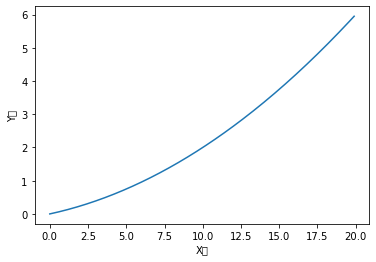

In [197]:
# 함수와 수치 미분 접선 그려보기
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0,20,0.1)
y = function_1(x)
plt.xlabel("X축") ; plt.ylabel("Y축")
plt.plot(x,y)
plt.show()

수치 미분 접선 만들기

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 52629 missing from current font.
  font.set_text(s, 0, flags=flags)


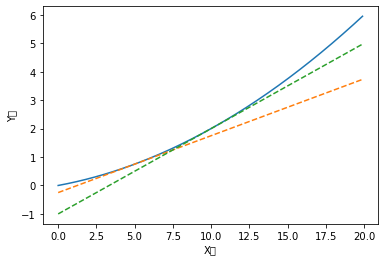

In [203]:
# 직선식
def gradient(a,x,y,X):
    return a*(X-x)+y

x1 = 5 ; y1 = function_1(x1) ; a1 = numerical_diff(function_1,x1)
x2 = 10 ; y2 = function_1(x2) ; a2 = numerical_diff(function_1,x2)

X = np.arange(0,20,0.1)
y = function_1(X)
plt.xlabel("X축") ; plt.ylabel("Y축")
plt.plot(X,y)
plt.plot(X,gradient(a1,x1,y1,X),"--")
plt.plot(X,gradient(a2,x2,y2,X),"--") 
plt.show()

편미분 구현하기
- 어떤 함수 f에 대해서 x라는 넘파이 배열

In [213]:
def function_2(x):
    # x 라는 배열은 x1 x2 x3... 이렇게 다양한 변수가 배열로 입력될 수 있다
    return x[0]**2 + x[1]**2

def numerical_gradient(f,x):
    h = 1e-4 # 수치 미분하기 위해서
    grad = np.zeros_like(x) # 편미분한 값을 담는 grad 배열
    
    # for문을 돌면서 x 배열의 변수마다 편미분 값을 구해주기
    for idx in range(x.size):
        val = x[idx]
        # f(x+h) 계산하기
        x[idx] = val + h
        fxh1 = f(x)
        
        # f(x-h) 계산하기
        x[idx] = val - h
        fxh2 = f(x)
        
        # 미분값 계산하기
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = val
        
    return grad 

In [216]:
print("[x0=3,x1=4] 에 대한 편미분 값",numerical_gradient(function_2,np.array([3.0,4.0])))
print("[x0=3,x1=0] 에 대한 편미분 값",numerical_gradient(function_2,np.array([3.0,0.0])))
print("[x0=4,x1=4] 에 대한 편미분 값",numerical_gradient(function_2,np.array([0.0,4.0])))

[x0=3,x1=4] 에 대한 편미분 값 [6. 8.]
[x0=3,x1=0] 에 대한 편미분 값 [6. 0.]
[x0=4,x1=4] 에 대한 편미분 값 [0. 8.]


경사하강법의 간단한 구현
- 편미분 기울기가 의미하는 것은 무조건 최솟값을 가르키는 것은 아니다
- 국소적인 최솟값(극소) 혹은 안정점일 수도 있기 때문이다
- 그렇더라도 기울기가 가르키는 방향으로 가게 되면 함숫값이 줄어든다
- 기울기가 제시한 방향을 단서로 하여 최소값으로 찾아가는 것이다

In [237]:
def gradient_descent(f,init_x,lr=0.1,step_num=100):
    x = init_x.copy()
    for i in range(100):
        x -= numerical_gradient(f,x) * lr
    return x

In [239]:
init_x = np.array([-3.0,4.0])
min_x = gradient_descent(function_2,init_x)
print("경사하강법을 통해 구한 최솟값 x0 x1",min_x)
print("최소의 손실함수 값",function_2(min_x))
print("초기의 손실함수 값",function_2(init_x))

경사하강법을 통해 구한 최솟값 x0 x1 [-6.11110793e-10  8.14814391e-10]
최소의 손실함수 값 1.0373788922158197e-18
초기의 손실함수 값 25.0


경사하강법의 갱신과정 시각화해보기
- 학습률이 0.1인 경우

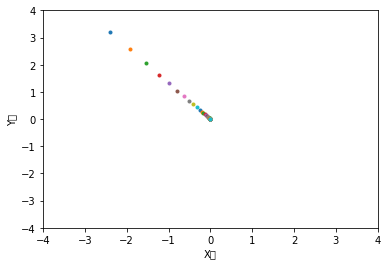

In [244]:
plt.xlabel("X축") ; plt.ylabel("Y축")
plt.xlim(-4,4) ; plt.ylim(-4,4)
x = np.array([-3.0,4.0])
for i in range(100):
    x -= numerical_gradient(function_2,x) * 0.1
    plt.plot(x[0],x[1],".")

학습률이 너무 작은 경우

[-2.99999994  3.99999992]


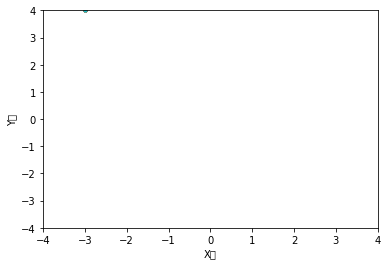

In [253]:
plt.xlabel("X축") ; plt.ylabel("Y축")
plt.xlim(-4,4) ; plt.ylim(-4,4)
x = np.array([-3.0,4.0])
for i in range(100):
    x -= numerical_gradient(function_2,x) * (1e-10)
    plt.plot(x[0],x[1],".")
print(x)

학습률이 너무 큰 경우

[6.08804931e-22 5.86305618e-21]


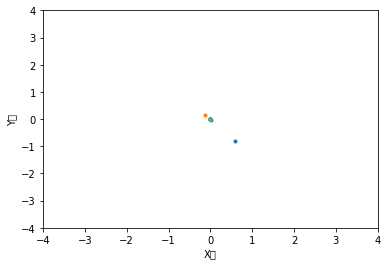

In [254]:
plt.xlabel("X축") ; plt.ylabel("Y축")
plt.xlim(-4,4) ; plt.ylim(-4,4)
x = np.array([-3.0,4.0])
for i in range(100):
    x -= numerical_gradient(function_2,x) * 0.6
   # print(i," 번째의 손실함수 값",function_2(x))
    plt.plot(x[0],x[1],".")
print(x)

### 신경망에서의 기울기

In [256]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax,cross_entropy_error
from common.gradient import numerical_gradient

In [313]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

In [314]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))
# T가 포함되는 이유 행렬 계산 때문에 그렇다

In [305]:
class simpleNet:
    def __init__(self):
        np.random.seed(0)
        self.W = np.random.randn(2,3)
        # self를 통해서 내부 변수 생성해주기
        
    def predict(self,x):
        return np.dot(x,self.W)
    
    def loss(self,x,t):
        # 예측을 했다면 손실함수 값을 측정해야한다.
        z = self.predict(x)
        y = softmax(z) # 확률이니까 softmax
        loss = cross_entropy_error(y,t) # 손실함수 CEE
        return loss

In [309]:
net = simpleNet() # 객체 생성하기
print(net.W) # 객체 내부의 변수를 불러오기
x = np.array([0.6,0.9]) # 입력값 x
p = net.predict(x) # 초기 입력값 x로 예측한 값
print(p)
np.argmax(p) # 최댓값의 인덱스 2
t = np.array([0,0,1]) # 정답 레이블
net.loss(x,t)
# 초기값과 W를 이용해서 손실함수 값을 계산한 것 -> 경사하강법을 통해서 W를 업데이트 해보자.

[[ 1.76405235  0.40015721  0.97873798]
 [ 2.2408932   1.86755799 -0.97727788]]
[ 3.07523529  1.92089652 -0.2923073 ]


3.6674507891066104

기울기 구하기

In [321]:
def f(W):
    return net.loss(x,t) # f 라는 손실함수를 계산해주는 함수를 정의해야 한다.

dW = numerical_gradient(f,net.W) # 매개변수에 대한 손실함수의 미분값 = 기울기
print(dW) # w11은 손실함수가 증가하는데 기여할 수 있기 때문에 음의 방향으로 갱신시켜야 손실함수가 감소한다

[[ 0.44453517  0.14013839 -0.58467355]
 [ 0.66680275  0.21020758 -0.87701033]]
